<a href="https://colab.research.google.com/github/Hugekyung/NLP/blob/master/snap-stanford/snap_stanford_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install snap-stanford

     |████████████████████████████████| 11.2MB 3.4MB/s 


In [2]:
import pandas as pd
import numpy as np

G1: Nodes 7707, Edges 9387
Number of Nodes: 7707
Number of nodes of zero degree: 0
Average degree: 2.4359673024523163
Size of largest strongly connected component: 7707
Number of connected components: 1
Number of communities: 37
Largest community: 1801
Smallest community: 4
Community 4: [-2064928118, 902598347, 903633014, 114855651, 1210153687, 1297968014, 1519760629, 1539577985, 1982750847, -1257000398, -1660001970, 686216706, 1373221780, -1700891187, -2046426615, 1432415352, 223549468, -602043608, -2136231375, 1487814119, 1101481949, 1338063925, 1539356057, -1524545972, 1424716303, 532758910, 537614368, 491145332, 1017841460, 1718541554, -299500114, 717987306, 1325247418, -350219325, -904995375, 1383824156, -2059002108, 13738506, 324446382, 1067270329, 1515313054, 1673398808, -1937607216, -2015159931, 1955084707, 1166452613, 1799424787, 2065697652, -1973840793, 1561521464, -2090414776, 1810914273, 1791031958, 1181295085, 1605682253, -1761440651, -1027498238, 158677593, -1572850215, -

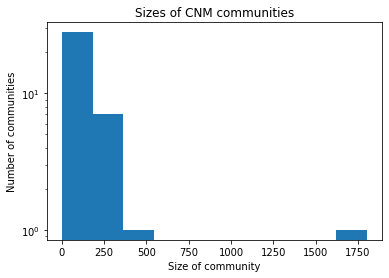

The modularity of the network is 0.804091


<Figure size 432x288 with 0 Axes>

In [3]:
## 강원도 파일로 돌린거

import snap
import matplotlib.pyplot as plt

# 그래프 만들기
G1 = snap.LoadEdgeList(snap.PUNGraph, "gw_2.txt", 0, 1) # PUNGraph -> 다른걸로 조정가능한듯?

print("G1: Nodes %d, Edges %d" % (G1.GetNodes(), G1.GetEdges()))
print("Number of Nodes: %d" % G1.GetNodes())

# 1.6 number of nodes of zero degree
print("Number of nodes of zero degree: %d" % snap.CntDegNodes(G1, 0))

# Get in degree distribution(분포정도)
DegToCntV = snap.TIntPrV()
snap.GetDegCnt(G1, DegToCntV)
degree = []
numNodes = []
sumDegrees = 0
for item in DegToCntV:
    degree.append(item.GetVal1())
    numNodes.append(item.GetVal2())
    sumDegrees += item.GetVal1()*item.GetVal2()
    #print("%d nodes with in-degree %d" % (item.GetVal2(), item.GetVal1()))

plt.plot(degree, numNodes)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('frequency')
plt.xlabel('degree')
plt.title('Degree distribution')
plt.savefig('degreeDist.png')
plt.clf()

# Get average degree
print("Average degree:", sumDegrees/float(sum(numNodes)))

# Get largest strongly connected component
MxScc = snap.GetMxScc(G1)
print("Size of largest strongly connected component:", MxScc.GetNodes())

# Get strongly connected components
Components = snap.TCnComV()
snap.GetWccs(G1, Components)
wcc_sizes = []
for CnCom in Components:
    wcc_sizes.append(CnCom.Len())

print("Number of connected components:", len(wcc_sizes))

# Clauset-Newman-Moore community detection
CmtyV = snap.TCnComV()
modularity = snap.CommunityCNM(G1, CmtyV)
count = 0
sizes = []
communities = []
for Cmty in CmtyV:
    listcmty = []
    for NI in Cmty:
        listcmty.append(NI)

    communities.append(listcmty)
    count += 1
    sizes.append(len(listcmty))
print("Number of communities:", count)
print("Largest community:", max(sizes))
print("Smallest community:", min(sizes))
print("Community 4:", communities[4])
print("Community 11:", communities[11])
print("Community 21:", communities[21])
print("Community 36:", communities[36])

# plot histogram of community sizes
sizes.sort()
plt.hist(sizes, log=True)
plt.xlabel("Size of community")
plt.ylabel("Number of communities")
plt.title("Sizes of CNM communities")
plt.show()
plt.savefig("cnm-sizes.png")
#print("Size of communities:", sizes)
print("The modularity of the network is %f" % modularity)